# Introduction

Le but de cette analyse est de nettoyer les données des diiférents fichiers reçus par mail (ERP, WEB et Liaison) puis, les rapprocher afin de ne créer qu'une seule base qui nous servira à calculer le chiffre d'affaires par produits, le chiffres d'affaire total mais également les valeurs aberrantes qui pourraient apparâitre à l'issu de nos différents rapprochements. 

In [1]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importation et nettoyage fichier erp

In [2]:
#Importation du fichier erp.csv
erp = pd.read_csv('Fichier_erp.csv',sep=";")

In [3]:
erp

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,"24,2",0,outofstock
1,3849,1,"34,3",0,outofstock
2,3850,1,"20,8",0,outofstock
3,4032,1,"14,1",0,outofstock
4,4039,1,46,0,outofstock
...,...,...,...,...,...
820,7203,0,45,30,instock
821,7204,0,45,9,instock
822,7247,1,"54,8",23,instock
823,7329,0,"26,5",14,instock


In [4]:
#Exploration du fichier erp.csv
erp.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      825 non-null    int64 
 1   onsale_web      825 non-null    int64 
 2   price           825 non-null    object
 3   stock_quantity  825 non-null    int64 
 4   stock_status    825 non-null    object
dtypes: int64(3), object(2)
memory usage: 32.4+ KB


# Vérification et traitement des doublons

In [5]:
# Identification des doublons erp.csv
duplicates = erp[erp.duplicated()]
print("Doublons identifiés :")
print(duplicates)

Doublons identifiés :
Empty DataFrame
Columns: [product_id, onsale_web, price, stock_quantity, stock_status]
Index: []


In [6]:
# Identification des éléments manquants product_id erp.csv
erp[erp["product_id"].isnull()]

,product_id,onsale_web,price,stock_quantity,stock_status


In [7]:
# Compte la somme total de tous les doublons dans la colonne product_id
erp["product_id"].duplicated().sum()

0

#La colonne product_id est bien la clé primaire du dataframe erp il n'y a pas de doublons dans la colonne


In [8]:
erp["price"]=erp["price"].replace(',', '.', regex=True).astype(float)

# Recherche des erreurs de saisie

In [9]:
# Identification des incohérence du dataframe erp
erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.384000,26.583030
std,902.644635,0.337506,26.832271,45.875948
min,3847.000000,0.000000,-8.000000,-1.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [10]:
# Affichage de toutes les lignes sur lesquelles le prix des bouteilles est négatif
erp[erp["price"]<0]

,product_id,onsale_web,price,stock_quantity,stock_status
469,5017,0,-8.0,0,outofstock
739,6594,0,-1.0,192,instock


In [11]:
# mise à zéro des prix inférieur à 0
erp.loc[erp["price"]<0,"price"]=0

In [12]:
# Identification des incohérence du dataframe erp
erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.394909,26.583030
std,902.644635,0.337506,26.817613,45.875948
min,3847.000000,0.000000,0.000000,-1.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [13]:
# Affichage de toutes les lignes sur lesquelles le stock des bouteilles est négatif
erp[erp["stock_quantity"]<0]

,product_id,onsale_web,price,stock_quantity,stock_status
449,4973,0,10.0,-1,outofstock
573,5700,1,44.5,-1,outofstock


# Correction des erreurs de saisie

In [14]:
# mise à zéro des stock inférieur à 0
erp.loc[erp["stock_quantity"]<0,"stock_quantity"]=0

In [15]:
# Vérification du nombre outofstock et instock
print(erp['stock_status'].value_counts())

stock_status
instock       638
outofstock    187
Name: count, dtype: int64


In [16]:
# Fonction pour vérifier et mettre à jour la valeur de stock_status
def update_stock_status(row):
    if row['stock_quantity'] > 0 and row['stock_status'] == 'outofstock':
        return 'instock'
    elif row['stock_quantity'] == 0 and row['stock_status'] == 'instock':
        return 'outofstock'
    else:
        return row['stock_status']

In [17]:
# Appliquer la fonction à chaque ligne du DataFrame
erp['stock_status'] = erp.apply(update_stock_status, axis=1)

In [18]:
# Vérification du changement 
print(erp['stock_status'].value_counts())

stock_status
instock       642
outofstock    183
Name: count, dtype: int64


In [19]:
# vérification de la correction des valeurs outofstock
erp.loc[(erp['stock_quantity'] > 0) & (erp['stock_status'] == 'outofstock')]

,product_id,onsale_web,price,stock_quantity,stock_status


In [20]:
# vérification de la correction des valeurs instock
erp.loc[(erp['stock_quantity'] == 0) & (erp['stock_status'] == 'instock')]


,product_id,onsale_web,price,stock_quantity,stock_status


In [21]:
# Compte le nombre de valeurs manquantes dans chaque colonne du dataframe erp.csv
print(erp.isnull().sum())

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64


In [22]:
# Vérification des prix

prix = erp['price'].unique()

sorted(prix)

[0.0,
 5.2,
 5.7,
 5.8,
 6.3,
 6.5,
 6.7,
 6.8,
 7.0,
 7.1,
 7.2,
 7.4,
 7.5,
 7.6,
 7.7,
 7.8,
 7.9,
 8.1,
 8.2,
 8.3,
 8.4,
 8.5,
 8.6,
 8.7,
 8.9,
 9.0,
 9.1,
 9.2,
 9.3,
 9.4,
 9.5,
 9.6,
 9.7,
 9.8,
 9.9,
 10.0,
 10.1,
 10.2,
 10.3,
 10.4,
 10.6,
 10.7,
 10.8,
 10.9,
 11.0,
 11.1,
 11.3,
 11.5,
 11.6,
 11.8,
 11.9,
 12.0,
 12.1,
 12.2,
 12.3,
 12.4,
 12.5,
 12.6,
 12.7,
 12.8,
 12.9,
 13.0,
 13.1,
 13.2,
 13.3,
 13.4,
 13.5,
 13.6,
 13.7,
 13.8,
 13.9,
 14.0,
 14.05,
 14.1,
 14.2,
 14.3,
 14.4,
 14.5,
 14.6,
 14.7,
 14.8,
 14.9,
 15.2,
 15.3,
 15.4,
 15.5,
 15.8,
 15.9,
 16.1,
 16.2,
 16.3,
 16.4,
 16.45,
 16.5,
 16.6,
 16.7,
 16.8,
 16.9,
 17.0,
 17.1,
 17.2,
 17.3,
 17.4,
 17.5,
 17.6,
 17.7,
 17.8,
 17.9,
 18.0,
 18.1,
 18.2,
 18.25,
 18.3,
 18.4,
 18.5,
 18.6,
 18.7,
 18.8,
 18.9,
 19.0,
 19.2,
 19.3,
 19.5,
 19.8,
 19.9,
 20.0,
 20.1,
 20.2,
 20.35,
 20.4,
 20.5,
 20.6,
 20.8,
 21.0,
 21.2,
 21.4,
 21.5,
 21.6,
 21.7,
 21.8,
 21.9,
 22.0,
 22.1,
 22.2,
 22.4,
 22.5,
 22.8,
 2

# Importation et nettoyage fichier web

In [23]:
#Importation du fichier web.xlsx
web = pd.read_excel('Fichier_web.xlsx')

C:\Users\CMFZ5302\AppData\Local\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [24]:
# Identification des incohérences du dataframe web
web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_password,post_modified,post_modified_gmt,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,1430,1430,0.0,0.0,1430,1430,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,3.855245,NaN,1.998601,2018-08-22 03:22:17.090909184,2018-08-22 01:53:30.097902080,NaN,NaN,2020-06-20 13:59:29.781818112,2020-06-20 12:06:02.509090816,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,2018-02-08 12:58:52,2018-02-08 11:58:52,NaN,NaN,2018-02-20 15:19:23,2018-02-20 14:19:23,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,2018-02-27 20:01:12.500000,2018-02-27 19:01:12.500000,NaN,NaN,2020-06-18 10:45:05.249999872,2020-06-18 08:45:05.249999872,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,2018-04-19 14:56:05,2018-04-19 12:56:05,NaN,NaN,2020-08-04 09:30:06,2020-08-04 07:30:06,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,2019-01-31 14:35:47,2019-01-31 13:35:47,NaN,NaN,2020-08-25 10:32:32,2020-08-25 08:32:32,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,2020-07-20 11:00:00,2020-07-20 09:00:00,NaN,NaN,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,7.702346,NaN,0.037385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


# Vérification et traitement des doublons

In [25]:
# Identification des doublons web.csv
duplicates = web[web.duplicated()]
print("Doublons identifiés :")
print(duplicates)

Doublons identifiés :
      sku  virtual  downloadable  rating_count  average_rating  total_sales  \
17    NaN        0             0             0             NaN          NaN   
82    NaN        0             0             0             NaN          NaN   
97    NaN        0             0             0             NaN          NaN   
121   NaN        0             0             0             NaN          NaN   
126   NaN        0             0             0             NaN          NaN   
...   ...      ...           ...           ...             ...          ...   
1378  NaN        0             0             0             NaN          NaN   
1421  NaN        0             0             0             NaN          NaN   
1448  NaN        0             0             0             NaN          NaN   
1450  NaN        0             0             0             NaN          NaN   
1496  NaN        0             0             0             NaN          NaN   

     tax_status  tax_class  p

In [26]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [27]:
# Suppression des doublons
web_drop = web.drop_duplicates()
print("DataFrame sans doublons :")
print(web_drop)

DataFrame sans doublons :
        sku  virtual  downloadable  rating_count  average_rating  total_sales  \
0     16004        0             0             0             0.0          5.0   
1       NaN        0             0             0             NaN          NaN   
2     15075        0             0             0             0.0          3.0   
3     16209        0             0             0             0.0          6.0   
4     15763        0             0             0             0.0          1.0   
...     ...      ...           ...           ...             ...          ...   
1508  12881        0             0             0             0.0          2.0   
1509  15663        0             0             0             0.0          3.0   
1510  15910        0             0             0             0.0          0.0   
1511     38        0             0             0             0.0         38.0   
1512  13599        0             0             0             0.0          1.0   

 

# Correction du nom de la colonne

In [28]:
# Renommer la colonne 'sku' en 'id_web'

web = web.rename(columns={'sku':'id_web'})

In [29]:
web_drop

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,12881,0,0,0,0.0,2.0,NaN,NaN,2.0,2019-03-28 15:25:14,...,montbourgeau-etoile-vin-jaune-2009,2019-12-30 10:30:01,2019-12-30 09:30:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15663,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1510,15910,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-28 10:59:43,...,thevenet-quintaine-vire-clesse-la-bongran-2015,2020-08-14 10:45:02,2020-08-14 08:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


# Vérification et traitement des valeurs manquantes

In [30]:
# Identification des éléments manquants web.csv
print(web_drop.isnull())

        sku  virtual  downloadable  rating_count  average_rating  total_sales  \
0     False    False         False         False           False        False   
1      True    False         False         False            True         True   
2     False    False         False         False           False        False   
3     False    False         False         False           False        False   
4     False    False         False         False           False        False   
...     ...      ...           ...           ...             ...          ...   
1508  False    False         False         False           False        False   
1509  False    False         False         False           False        False   
1510  False    False         False         False           False        False   
1511  False    False         False         False           False        False   
1512  False    False         False         False           False        False   

      tax_status  tax_class

In [31]:
# Compte le nombre de valeurs manquantes dans chaque colonne du dataframe web.csv
print(web_drop.isnull().sum())

sku                         3
virtual                     0
downloadable                0
rating_count                0
average_rating              1
total_sales                 1
tax_status                715
tax_class                1431
post_author                 1
post_date                   1
post_date_gmt               1
post_content             1431
post_title                  1
post_excerpt              715
post_status                 1
comment_status              1
ping_status                 1
post_password            1431
post_name                   1
post_modified               1
post_modified_gmt           1
post_content_filtered    1431
post_parent                 1
guid                        1
menu_order                  1
post_type                   1
post_mime_type            717
comment_count               1
dtype: int64


In [32]:
# Suppression des colonnes avec beaucoup de valeurs manquantes
web.drop(['tax_status', 'tax_class','post_content','post_excerpt','post_password', 'post_content_filtered', 'post_mime_type'], axis=1, inplace=True)


In [33]:
# Vérification
web.columns

Index(['id_web', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'post_author', 'post_date', 'post_date_gmt',
       'post_title', 'post_status', 'comment_status', 'ping_status',
       'post_name', 'post_modified', 'post_modified_gmt', 'post_parent',
       'guid', 'menu_order', 'post_type', 'comment_count'],
      dtype='object')

In [34]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_web             1428 non-null   object        
 1   virtual            1513 non-null   int64         
 2   downloadable       1513 non-null   int64         
 3   rating_count       1513 non-null   int64         
 4   average_rating     1430 non-null   float64       
 5   total_sales        1430 non-null   float64       
 6   post_author        1430 non-null   float64       
 7   post_date          1430 non-null   datetime64[ns]
 8   post_date_gmt      1430 non-null   datetime64[ns]
 9   post_title         1430 non-null   object        
 10  post_status        1430 non-null   object        
 11  comment_status     1430 non-null   object        
 12  ping_status        1430 non-null   object        
 13  post_name          1430 non-null   object        
 14  post_mod

In [35]:
# Création d'un dataframe pour isoler et supprimer les valeurs NaN 
web_null = web[web['id_web'].isnull()]

In [36]:
web_null.shape

(85, 21)

In [37]:
web_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 1 to 1496
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_web             0 non-null      object        
 1   virtual            85 non-null     int64         
 2   downloadable       85 non-null     int64         
 3   rating_count       85 non-null     int64         
 4   average_rating     2 non-null      float64       
 5   total_sales        2 non-null      float64       
 6   post_author        2 non-null      float64       
 7   post_date          2 non-null      datetime64[ns]
 8   post_date_gmt      2 non-null      datetime64[ns]
 9   post_title         2 non-null      object        
 10  post_status        2 non-null      object        
 11  comment_status     2 non-null      object        
 12  ping_status        2 non-null      object        
 13  post_name          2 non-null      object        
 14  post_modified  

In [38]:
web_null.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,post_author,post_date,post_date_gmt,post_title,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
1,NaN,0,0,0,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
17,NaN,0,0,0,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
82,NaN,0,0,0,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
97,NaN,0,0,0,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN
121,NaN,0,0,0,NaN,NaN,NaN,NaT,NaT,NaN,...,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN


In [39]:
web_null_post = web_null[web_null['post_name'].notnull()]
print(web_null_post.shape)
web_null_post.head()

(2, 21)


,id_web,virtual,downloadable,rating_count,average_rating,total_sales,post_author,post_date,post_date_gmt,post_title,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
353,NaN,0,0,0,0.0,3.0,2.0,2018-08-08 11:23:43,2018-08-08 09:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,...,closed,closed,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
488,NaN,0,0,0,0.0,10.0,2.0,2018-07-31 12:07:23,2018-07-31 10:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,...,closed,closed,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0


In [40]:
#Suppression des lignes car on n'a pas la réponse métier 
web = web.dropna(subset=['id_web'])
web.shape

(1428, 21)

In [41]:
web.isnull().sum()

id_web               0
virtual              0
downloadable         0
rating_count         0
average_rating       0
total_sales          0
post_author          0
post_date            0
post_date_gmt        0
post_title           0
post_status          0
comment_status       0
ping_status          0
post_name            0
post_modified        0
post_modified_gmt    0
post_parent          0
guid                 0
menu_order           0
post_type            0
comment_count        0
dtype: int64

In [42]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1428 entries, 0 to 1512
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_web             1428 non-null   object        
 1   virtual            1428 non-null   int64         
 2   downloadable       1428 non-null   int64         
 3   rating_count       1428 non-null   int64         
 4   average_rating     1428 non-null   float64       
 5   total_sales        1428 non-null   float64       
 6   post_author        1428 non-null   float64       
 7   post_date          1428 non-null   datetime64[ns]
 8   post_date_gmt      1428 non-null   datetime64[ns]
 9   post_title         1428 non-null   object        
 10  post_status        1428 non-null   object        
 11  comment_status     1428 non-null   object        
 12  ping_status        1428 non-null   object        
 13  post_name          1428 non-null   object        
 14  post_modified

In [43]:
web.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,post_author,post_date,post_date_gmt,post_title,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
0,16004,0,0,0,0.0,5.0,2.0,2018-06-07 16:27:25,2018-06-07 14:27:25,Château du Couvent Pomerol 2017,...,closed,closed,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,0.0
2,15075,0,0,0,0.0,3.0,2.0,2018-02-14 15:39:43,2018-02-14 14:39:43,Parés Baltà Penedès Indigena 2017,...,closed,closed,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
3,16209,0,0,0,0.0,6.0,2.0,2018-02-14 17:15:31,2018-02-14 16:15:31,Maurel Cabardès Tradition 2017,...,closed,closed,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
4,15763,0,0,0,0.0,1.0,2.0,2020-01-25 14:08:16,2020-01-25 13:08:16,Domaine de la Monardière Vacqueyras Vieilles V...,...,closed,closed,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,0.0
5,13895,0,0,0,0.0,0.0,2.0,2019-03-19 10:41:50,2019-03-19 09:41:50,Château Saransot-Dupré Bordeaux Blanc 2016,...,closed,closed,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0


In [44]:
web[web['id_web']== 15075]

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,post_author,post_date,post_date_gmt,post_title,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
2,15075,0,0,0,0.0,3.0,2.0,2018-02-14 15:39:43,2018-02-14 14:39:43,Parés Baltà Penedès Indigena 2017,...,closed,closed,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0
1432,15075,0,0,0,0.0,3.0,2.0,2018-02-14 15:39:43,2018-02-14 14:39:43,Parés Baltà Penedès Indigena 2017,...,closed,closed,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,0.0


In [45]:
# création d'un dataframe qui contient uniquement les products
web_product = web[web['post_type']=='product']

In [46]:
# vérification de l'unicité de la colonne web_product
web_product['id_web'].duplicated().sum()

0

In [47]:
web_product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 2 to 1510
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_web             714 non-null    object        
 1   virtual            714 non-null    int64         
 2   downloadable       714 non-null    int64         
 3   rating_count       714 non-null    int64         
 4   average_rating     714 non-null    float64       
 5   total_sales        714 non-null    float64       
 6   post_author        714 non-null    float64       
 7   post_date          714 non-null    datetime64[ns]
 8   post_date_gmt      714 non-null    datetime64[ns]
 9   post_title         714 non-null    object        
 10  post_status        714 non-null    object        
 11  comment_status     714 non-null    object        
 12  ping_status        714 non-null    object        
 13  post_name          714 non-null    object        
 14  post_modified 

In [48]:
#unicité de la colonne id_web
web_product.shape[0] == web_product['id_web'].nunique()

True

In [49]:
web['post_type'].unique()

array(['attachment', 'product'], dtype=object)

In [50]:
web.shape

(1428, 21)

In [51]:
web_product.shape

(714, 21)

# Vérification des erreurs lexical

In [52]:
# Correction de l'erreur lexical dans la colone 'id_web'
'''
new_id = min(web['id_web'])
new_id = int(new_id)-1
web['id_web'] = web['id_web'].replace('bon-cadeau-25-euros', new_id)
web['id_web']

'''

"\nnew_id = min(web['id_web'])\nnew_id = int(new_id)-1\nweb['id_web'] = web['id_web'].replace('bon-cadeau-25-euros', new_id)\nweb['id_web']\n\n"

In [53]:
# Vérification de l'erreur lexical

web[web['id_web'] == '13127-1']

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,post_author,post_date,post_date_gmt,post_title,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count
490,13127-1,0,0,0,0.0,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,...,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,0.0
503,13127-1,0,0,0,0.0,0.0,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,...,closed,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0


In [54]:
web[web['id_web'] == '13127']

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,post_author,post_date,post_date_gmt,post_title,...,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count


# Importation et nettoyage fichier liaison

In [55]:
#Importation du fichier liaison.csv
liaison = pd.read_csv('fichier_liaison.csv',sep=";")

# Vérification et traitements des éléments manquants

In [56]:
# Identification des incohérences du dataframe liaison
liaison.describe()

,product_id
count,825.000000
mean,5162.597576
std,902.644635
min,3847.000000
25%,4348.000000
50%,4907.000000
75%,5805.000000
max,7338.000000


In [57]:
liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [58]:
# Identification des éléments manquants liaison.csv
print(liaison.isnull())

     product_id  id_web
0         False   False
1         False   False
2         False   False
3         False   False
4         False   False
..          ...     ...
820       False    True
821       False    True
822       False   False
823       False   False
824       False   False

[825 rows x 2 columns]


In [59]:
# Compte le nombre de valeurs manquantes dans chaque colonne du dataframe liaison.csv
print(liaison.isnull().sum())

product_id     0
id_web        91
dtype: int64


# Vérification et traitement des doublons 

In [60]:
# Identification des doublons liaison.csv
duplicates = liaison[liaison.duplicated()]
print("Doublons identifiés :")
print(duplicates)

Doublons identifiés :
Empty DataFrame
Columns: [product_id, id_web]
Index: []


In [61]:
#changement du nom de la colonne sku par id_web
liaison.rename(columns={"SKU": "id_web"}, inplace=True)

In [62]:
#Affichage les 5 premières lignes de la table pour voir les modifications
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [63]:
# Recherche des valeurs null (NaN)

print(liaison.isnull().sum())

product_id     0
id_web        91
dtype: int64


In [64]:
# Suppression des valeurs null (NaN)

liaison = liaison.dropna()
liaison

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
792,7023,15891
793,7025,15887
822,7247,13127-1
823,7329,14680-1


In [65]:
# Recherche des doublons

liaison.loc[liaison['id_web'].duplicated(keep=False),:]

,product_id,id_web


In [66]:
liaison[liaison['id_web'] == 'bon-cadeau-25-euros']

,product_id,id_web
443,4954,bon-cadeau-25-euros


In [67]:
# Unicité de la colonne product_id
liaison.shape[0]== liaison['product_id'].nunique()

True

# Merge entre les différents fichiers


In [68]:
# Premier Merge entre les données du fichier erp et les données du fichier liaison

dataLE = pd.merge(liaison, erp, how="inner", on="product_id")
dataLE

,product_id,id_web,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.2,0,outofstock
1,3849,15296,1,34.3,0,outofstock
2,3850,15300,1,20.8,0,outofstock
3,4032,19814,1,14.1,0,outofstock
4,4039,19815,1,46.0,0,outofstock
...,...,...,...,...,...,...
729,7023,15891,1,27.5,15,instock
730,7025,15887,1,69.0,2,instock
731,7247,13127-1,1,54.8,23,instock
732,7329,14680-1,0,26.5,14,instock


In [69]:
# Vérification des valeurs null après la fusion des données

print(dataLE.isnull().sum())

product_id        0
id_web            0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64


In [70]:
dataLE.dtypes

product_id          int64
id_web             object
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [71]:
web_product.dtypes

id_web                       object
virtual                       int64
downloadable                  int64
rating_count                  int64
average_rating              float64
total_sales                 float64
post_author                 float64
post_date            datetime64[ns]
post_date_gmt        datetime64[ns]
post_title                   object
post_status                  object
comment_status               object
ping_status                  object
post_name                    object
post_modified        datetime64[ns]
post_modified_gmt    datetime64[ns]
post_parent                 float64
guid                         object
menu_order                  float64
post_type                    object
comment_count               float64
dtype: object

In [72]:
# Changement de typage de la colonne
dataLE["id_web"]=dataLE["id_web"].astype(str)

In [73]:
web_product["id_web"]=web_product["id_web"].astype(str)

C:\Users\CMFZ5302\AppData\Local\Temp\1\ipykernel_11776\399014121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  web_product["id_web"]=web_product["id_web"].astype(str)


In [74]:
# Deuxième Merge entre le premier Merge et les données du fichier web

data = pd.merge(dataLE, web_product, how="outer", on= "id_web", indicator = True) 
data

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,_merge
0,3847,15298,1,24.2,0,outofstock,0.0,0.0,0.0,0.0,...,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both
1,3849,15296,1,34.3,0,outofstock,0.0,0.0,0.0,0.0,...,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both
2,3850,15300,1,20.8,0,outofstock,0.0,0.0,0.0,0.0,...,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both
3,4032,19814,1,14.1,0,outofstock,0.0,0.0,0.0,0.0,...,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both
4,4039,19815,1,46.0,0,outofstock,0.0,0.0,0.0,0.0,...,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,7023,15891,1,27.5,15,instock,0.0,0.0,0.0,0.0,...,closed,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both
730,7025,15887,1,69.0,2,instock,0.0,0.0,0.0,0.0,...,closed,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both
731,7247,13127-1,1,54.8,23,instock,0.0,0.0,0.0,0.0,...,closed,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both
732,7329,14680-1,0,26.5,14,instock,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only


In [75]:
data['_merge'].value_counts()

_merge
both          714
left_only      20
right_only      0
Name: count, dtype: int64

In [76]:
data[data['_merge']=='left_only']

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,_merge
185,4289,13771,0,22.8,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
227,4568,15065,0,21.5,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
230,4584,14785,0,32.3,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
334,4741,12601,0,12.4,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
368,4864,15154,0,8.3,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
371,4869,14360,0,17.2,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
399,4921,15608,0,13.8,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
400,4922,15586,0,21.5,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
443,5018,15272,0,15.4,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only
445,5021,15630,0,17.1,0,outofstock,NaN,NaN,NaN,NaN,...,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,left_only


la plupart des produits que l'on arrive pas à retrouver dans le système sont des produits hors stock

In [77]:
df_erp_web = data[data['_merge']=='both']

In [78]:
df_erp_web.shape

(714, 27)

# Chiffre d'affaires par produits 

In [79]:
# Chiffre d'affaire = prix du produit * nombre de produit vendu

df_erp_web  = df_erp_web.assign(CA = df_erp_web ['price']*df_erp_web['total_sales'])
df_erp_web[['product_id','id_web','price','total_sales','post_title','CA']]

,product_id,id_web,price,total_sales,post_title,CA
0,3847,15298,24.2,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,145.2
1,3849,15296,34.3,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,0.0
2,3850,15300,20.8,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,0.0
3,4032,19814,14.1,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,42.3
4,4039,19815,46.0,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,0.0
...,...,...,...,...,...,...
728,6930,16135,8.4,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,42.0
729,7023,15891,27.5,0.0,Camin Larredya Jurançon Sec La Virada 2018,0.0
730,7025,15887,69.0,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,0.0
731,7247,13127-1,54.8,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,0.0


# Chiffre d'affaire total 

In [80]:
# Chiffre total = somme de tous les chiffres d'affaires par produits 
total = sum(df_erp_web['CA'])
print("Le chiffre d'affaire total est de :",total,"€")

Le chiffre d'affaire total est de : 70568.6 €


# Analyse des prix des produits

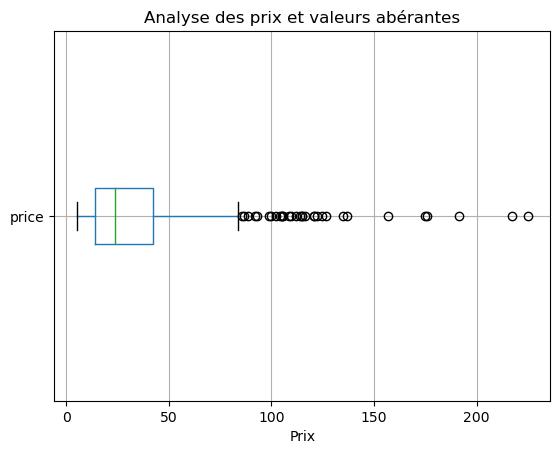

In [81]:
df_erp_web.boxplot(column='price', vert=False)
plt.title('Analyse des prix et valeurs abérantes')
plt.xlabel('Prix')
plt.show()

# Calcul de la médiane, interquartile et moyenne de prix 

In [82]:
# Calcul de la moyenne 
moyenne = np.mean(df_erp_web['price'])
print ("La moyenne de prix est de : ", round(moyenne, 2))

La moyenne de prix est de :  32.49


In [83]:
# Calcul de la mediane
mediane = np.median(df_erp_web['price'])
print ("La mediane des prix est de : ", round(mediane, 2))

La mediane des prix est de :  23.55


In [84]:
# Calcul de l'interquartile
# On calcule le quantile 0,25 qui est le quartile Q1
Q1 = round(np.percentile(df_erp_web['price'], 25))
print("Quartile Q1 vaut : ", round(np.percentile(df_erp_web['price'], 25)))
 
# On calcule le quantile 0,75 qui est le quartile Q3
Q3 = round(np.percentile(df_erp_web['price'], 75))
print("Quartile Q3 vaut : ", round(np.percentile(df_erp_web['price'], 75)))
 
# L ecart interquartile est Q3 - Q1
print("L ecart interquartile vaut : ", Q3 - Q1)

Quartile Q1 vaut :  14
Quartile Q3 vaut :  42
L ecart interquartile vaut :  28


50% des produits ont un prix compris entre 14€ et 42€

# Liste des outlier

Méthode IQR en calculant des seuils minimum ou maximum elle va identifier les outliers ou valeurs aberrantes 

In [85]:
IQR = Q3-Q1

In [86]:
IQR

28

In [87]:
seuil_maximum = Q3+(1.5*IQR)

In [88]:
seuil_maximum

84.0

In [89]:
seuil_minimum = Q1-(1.5*IQR)

In [90]:
seuil_minimum

-28.0

Il n'y a pas de prix négatifs dans notre jeux de données donc, le seuil_minimum cela est non applicable 

In [91]:
outlier = df_erp_web[df_erp_web['price']>seuil_maximum]
print(len(outlier), "produits ayant un prix considéré comme valeur extrême")
outlier

32 produits ayant un prix considéré comme valeur extrême


,product_id,id_web,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,_merge,CA
63,4115,15382,1,100.0,11,instock,0.0,0.0,0.0,0.0,...,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,2020-02-08 11:45:02,2020-02-08 10:45:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both,0.0
65,4132,11668,1,88.4,5,instock,0.0,0.0,0.0,0.0,...,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,2020-02-20 09:55:02,2020-02-20 08:55:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both,0.0
200,4352,15940,1,225.0,0,outofstock,0.0,0.0,0.0,0.0,...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both,1125.0
202,4355,12589,1,126.5,2,instock,0.0,0.0,0.0,0.0,...,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both,1391.5
206,4359,13853,1,85.6,0,outofstock,0.0,0.0,0.0,0.0,...,champagne-larmandier-bernier-grand-cru-vieille...,2019-12-23 09:30:11,2019-12-23 08:30:11,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both,85.6
219,4402,3510,1,176.0,8,instock,0.0,0.0,0.0,0.0,...,cognac-frapin-vip-xo,2020-08-22 11:35:03,2020-08-22 09:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both,2288.0
220,4404,3507,1,108.5,2,instock,0.0,0.0,0.0,0.0,...,cognac-frapin-fontpinot-xo,2020-08-12 09:30:16,2020-08-12 07:30:16,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both,217.0
222,4406,7819,1,157.0,3,instock,0.0,0.0,0.0,0.0,...,cognac-frapin-chateau-de-fontpinot-1989-20-ans,2020-03-14 16:05:04,2020-03-14 15:05:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both,0.0
223,4407,3509,1,104.0,6,instock,0.0,0.0,0.0,0.0,...,cognac-frapin-cigar-blend,2020-07-04 09:45:03,2020-07-04 07:45:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both,104.0
229,4582,12857,1,109.6,7,instock,0.0,0.0,0.0,0.0,...,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both,0.0


32 produits ont un prix considéré comme extrême 

Par rapport au contexte métier, ce sont des produits avec des prix normaux pour ce types de bouteilles (millésimes) en soi, ce ne sont pas des valeurs aberrantes mais plus des valeurs extrêmes 

# méthode z-score

Calcul de la moyenne et écart type

In [92]:
z_score = (df_erp_web["price"])
mean = np.mean(df_erp_web["price"])
std = np.std(df_erp_web["price"])
print('la moyenne des données est', mean)
print('std. écart est', std)

la moyenne des données est 32.49313725490196
std. écart est 27.791042941002935


Calcul du z_score si z_score>3 c'est une valeur aberrante 

In [93]:
threshold = 3
outlier = []
for i in z_score:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('les valeurs sont aberrantes sont', outlier)

les valeurs sont aberrantes sont [225.0, 126.5, 176.0, 157.0, 137.0, 217.5, 124.8, 175.0, 191.3, 122.0, 135.0, 116.4, 121.0, 121.0]


In [94]:
# Création d'un dataframe avec uniquement les outliers 
df_erp_web['zscore'] = ( df_erp_web['price'] - df_erp_web['price'].mean() ) /\
                         df_erp_web['price'].std()

In [95]:
df_web_outlier=df_erp_web[df_erp_web['zscore']>3]

In [96]:
df_web_outlier

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,comment_count,_merge,CA,zscore
200,4352,15940,1,225.0,0,outofstock,0.0,0.0,0.0,0.0,...,2020-03-07 11:18:45,2020-03-07 10:18:45,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both,1125.0,6.922087
202,4355,12589,1,126.5,2,instock,0.0,0.0,0.0,0.0,...,2020-08-13 10:15:02,2020-08-13 08:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both,1391.5,3.380262
219,4402,3510,1,176.0,8,instock,0.0,0.0,0.0,0.0,...,2020-08-22 11:35:03,2020-08-22 09:35:03,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both,2288.0,5.160164
222,4406,7819,1,157.0,3,instock,0.0,0.0,0.0,0.0,...,2020-03-14 16:05:04,2020-03-14 15:05:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both,0.0,4.476969
387,4904,14220,1,137.0,13,instock,0.0,0.0,0.0,0.0,...,2020-05-19 17:15:02,2020-05-19 15:15:02,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both,685.0,3.757817
434,5001,14581,1,217.5,20,instock,0.0,0.0,0.0,0.0,...,2020-05-16 09:00:05,2020-05-16 07:00:05,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both,0.0,6.652405
524,5612,14915,1,124.8,12,instock,0.0,0.0,0.0,0.0,...,2019-01-23 09:33:57,2019-01-23 08:33:57,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both,0.0,3.319134
566,5767,15185,1,175.0,12,instock,0.0,0.0,0.0,0.0,...,2020-06-11 15:25:04,2020-06-11 13:25:04,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both,0.0,5.124206
601,5892,14983,1,191.3,10,instock,0.0,0.0,0.0,0.0,...,2020-04-01 09:30:09,2020-04-01 07:30:09,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both,573.9,5.710315
617,5917,14775,1,122.0,4,instock,0.0,0.0,0.0,0.0,...,2020-03-11 09:30:09,2020-03-11 08:30:09,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0.0,both,0.0,3.218453


# Conclusion et synthèse

Au niveau du nettoyage des données, il y avait beaucoup de données manquantes, des colonnes non utilisées, des doublons pour les produits et quelques erreurs lexicales. Il y avait également des valeurs nulles et des incohérences dans la quantité et les status des stocks. Dans ces conditions, il est important de discuter avec les équipes métiers afin de comprendre les incohérences et les erreurs pour reconstruire une base solide qui pourra durer dans le temps. 

# Recommandations

Automatiser la partie nettoyage pour aller plus loin et créer des extractions dédiés pour les data analyst